### 머신러닝 개념 
#### 선형회귀(Linear Regression) : 1차 함수, 직선의 방정식
- 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정
- 편향(Bias) : 기본 출력값이 활성화되는 정도를 설정

#### 비용함수(Cost Function)
- cost(비용) = 오차 = 에러 = 손실(loss)
- cost(W,b) = (H(x) - y)^2

#### 예측(가설 ,Hypothesis) 함수
- H(x) = WX + b
   
#### 경사하강법(Gradient Descent Alogorithm)
- 비용이 가장 작은 기울기값을 구하는 알고리즘

18.666666666666668
4.666666666666667
0.0
4.666666666666667
18.666666666666668


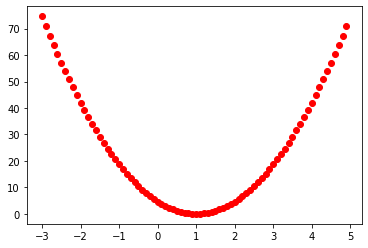

In [10]:
# 비용함수 구현
def cost(x,y,w) :
    c = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2
        c += loss        
    return c/(len(x))

x = [1,2,3]
y = [1,2,3]
# y = [2,4,6]
# y = [1,3,5]
print(cost(x,y,-1))
print(cost(x,y,0))
print(cost(x,y,1))        
print(cost(x,y,2))  
print(cost(x,y,3))  

import matplotlib.pyplot as plt
# 비용함수의 그래프 출력
# x축 : w (기울기)
# y축 : cost (비용)
for i in range(-30,50):
    w = i/10
    c = cost(x,y,w)
#     print(w,c)
    plt.plot(w,c,'ro')
plt.show()

In [11]:
# 미분 : 순간 변화량, 기울기
#    x축으로 1만큼 움직였을 때 y축으로 움직인 거리

# y = 3       ===>   y' = 0
# y = 2x      ===>   y' = 2
# y = x^2     ===>   y' = 2x
# y = (x+1)^2 ===>   y' = 2(x+1)

In [23]:
# 경사하강법(GD)

def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w * x[i]   # 예측함수
        loss = (hx - y[i])*x[i]  # 비용함합수의 미분값
        # loss  = w^2 * x[i]^2 - 2 * w*x[i]*y[i] + y[i]^2
        #  loss' = 2*w * x[i]^2 - 2 * x[i]*y[i] = x[i](hx - y[i])
        c += loss
    return c/len(x)

# train  : 학습
x = [1,2,3]
y = [1,2,3]
# y = [3,6,7]

w,old= 10,100
for i in range(100):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad  # learning rate(학습율) :0.1
#     print(i,c,old,w,grad)
    
    if c >= old and abs(c - old) < 1.0e-15:
        break
    old = c
    
print('weight:',w) # weight: 1.0

# predict
x = 5
hx = w*x
print('x=5 H(x):',hx)
print('x=11 H(x):',w*11)
        

weight: 1.0
x=5 H(x): 5.0
x=11 H(x): 11.0


### 퍼셉트론 : 다수의 신호를 입력받아서 하나의 신호로 출력


In [25]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # 임계값
        return 0
    elif tmp > theta:
        return 1
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

# XOR Problem :  학습해서 해결 불가능하다

0
0
0
1


### Boston 주택가격 예측
#### scikit-learn 사용

         CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  MEDV
0     2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403     14.7  23.8
1    13.35980   0.0  18.10  0.693  5.887  94.7  1.7821  666     20.2  12.7
2     0.12744   0.0   6.91  0.448  6.770   2.9  5.7209  233     17.9  26.6
3     0.15876   0.0  10.81  0.413  5.961  17.5  5.2873  305     19.2  21.7
4     0.03768  80.0   1.52  0.404  7.274  38.3  7.3090  329     12.6  34.6
..        ...   ...    ...    ...    ...   ...     ...  ...      ...   ...
395   0.23912   0.0   9.69  0.585  6.019  65.3  2.4091  391     19.2  21.2
396   0.04560   0.0  13.89  0.550  5.888  56.0  3.1121  276     16.4  23.3
397   1.38799   0.0   8.14  0.538  5.950  82.0  3.9900  307     21.0  13.2
398   7.36711   0.0  18.10  0.679  6.193  78.1  1.9356  666     20.2  11.0
399   0.14150   0.0   6.91  0.448  6.169   6.6  5.7209  233     17.9  25.3

[400 rows x 10 columns]


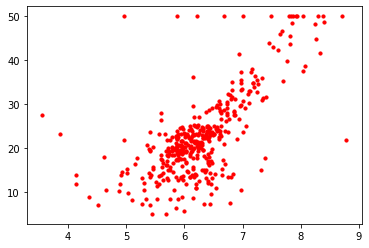

In [71]:
import numpy as np
import pandas as pd

# Boston 주택가격 데이터셋을 가져오기
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(type(boston.data))
# print(boston.DESCR) # 정보를 출력

df = pd.read_csv('boston_train.csv')
import matplotlib.pyplot as plt
# plt.scatter(boston.data[:,5],boston.target,color='r',s=10)
plt.scatter(df['RM'],df['MEDV'],color='r',s=10)
print(df)
plt.show()   # X: 'RM'  , Y : 'MEDV'
# print(boston.data)

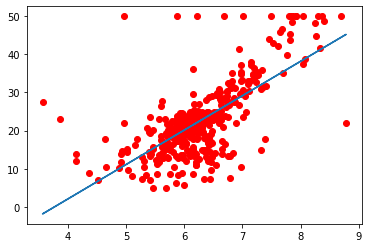

In [65]:
# 1 차원 회귀 모형의 예측

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = df['RM'].values.reshape(-1,1) # 2차원, (n,1)
y = df['MEDV'].values.reshape(-1,1)

# x = boston.data[:,5]
# x_1 = np.atleast_2d(x)  # 2차원 (1,n)
# x_2 = np.transpose(x_1) # (n,1)

lr.fit(x,y)  # 회귀 모형을 생성, 학습

# 예측
y_predicted = lr.predict(x)
plt.scatter(x,y,color='r')
plt.plot(x,y_predicted)
plt.show()


In [70]:
# 적합도 측정
# RMSE(Root Mean Squared Error) ,평균 제곱근 오차

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


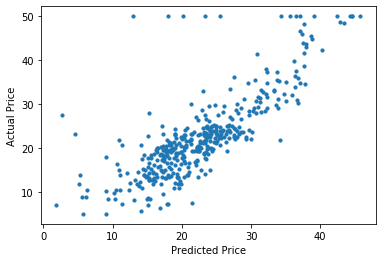

RMSE: 5.753475905312981
r2_score: 0.6378499850549992
RMSE: 4.168349275328514


In [89]:
# 다차원 회귀

x = df.iloc[:,:-1]    # (400, 9)
y = df['MEDV'].values.reshape(-1,1)  # (400, 1)
lr.fit(x,y)  # 회귀 모형을 생성, 학습

y_predict = lr.predict(x) # 예측
# print(x,y_predict)

plt.scatter(y_predict,y,s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 5.753475905312981

r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)


# test 데이터 셋을 사용한 예측
test = pd.read_csv('boston_test.csv')
x_test = test.iloc[:,:-1]    # (400, 9)
y_test = test['MEDV'].values.reshape(-1,1)  # (400, 1)

y_test_predict = lr.predict(x_test) # 예측
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 4.168349275328514